Philippe Joly 2025-08-20

# Timestream Overview

This notebook serves as an overview of the MARS / test data in time stream form (found using get_timestream)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from os import path
sys.path.append(path.expanduser('~'))

In [2]:


fns = [
    "/scratch/philj0ly/simple_test_data/timeStream/time_stream_1721500041-1721500046_8192_37_121-122.npz",
]

data = []
missing_fraction = []
chans = []

for fn in fns:
    with np.load(fn) as f:
        data.append(f['data'])
        missing_fraction.append(f["missing_fraction"])
        chans.append(f['chans'])


In [23]:
dt = 5/data[0].shape[-1] # recording time / total_samples
dt_theo = 1/250e6
print(dt, dt_theo)

4.0273408632020695e-09 4e-09


Note that, as expected, the time delta between 2 samples is ~4ns which matches the 250 MSPS recording frequency

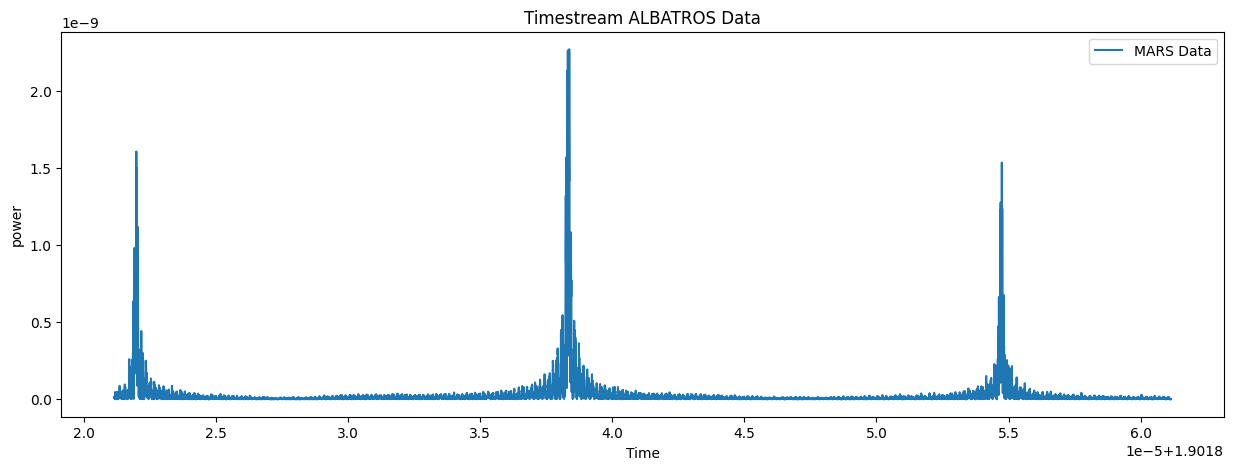

In [30]:
pu = ['MARS Data',]
t0 = np.random.randint(0, data[0].shape[-1]-1)
t_range = 10000

plt.figure(figsize=(15,5))
for i in range(len(fns)):
    # if i != 1:
    plt.plot(np.arange(t0+1, t0+t_range+1)*4e-9, np.abs(data[i][0, 0, t0:t0+t_range]), label=pu[i])

plt.title("Timestream ALBATROS Data")
plt.xlabel("Time")
plt.ylabel("power")
plt.legend()
plt.show()

Looks like peaks ~16 000 ns apart. Note that is equivalent to ~61 kHz (the storing bin width of ALBATROS data). 

In [31]:
1/(16000e-9)

62500.0

In [7]:
spectra = []
freqs = []

for i in range(len(data)):
    spectra.append(np.ma.MaskedArray(data=data[i], mask=mask[i]))
    freqs.append(chans[i]*df) # (Hz)


NameError: name 'mask' is not defined

In [ ]:
t = 101
# pu = ['gpu og accl=14336 cut=1024', 'stream_comp accl=14336 cut=1024', 'stream accl=1024 cut=10']
# pu = ['cpu og', 'stream nblock=1 acclen=1024 cut=10', 'stream nblock=3 acclen=1024 cut=10', 'stream nblock=3 acclen=1024 cut=100', 'stream nblock=3 acclen=2048 cut=100',]

pu = ['gpu og', 'stream', 'clean', 'gpu og2', 'stream2', 'clean2']
plt.figure(figsize=(15,5))
for i in range(len(fns)):
    # if i != 1:
    plt.plot(freqs[i], np.log10(np.abs(spectra[i][0,0,:,t])), label=pu[i])
    # break
    # plt.plot(freqs[i], np.abs(spectra[i][0,0,:,t]), label=pu[i])


# x0 = 6.79e6
# dx = 100
# plt.xlim(x0,x0+dx)
# plt.ylim(0,1)

plt.xlabel('Frequency (Hz)')   
plt.ylabel('Log10 Amplitude')
plt.legend()

plt.show()